In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pysindy import SINDy
from pysindy.optimizers import SR3,ConstrainedSR3
from pysindy.feature_library import PolynomialLibrary,CustomLibrary
from pysindy.differentiation import FiniteDifference
from scipy.integrate import odeint

In [2]:
def plot_trajectories(x,x_train,x_sim) :
    # plot the true and predicted modes
    plt.figure(5)
    plt.subplot(4,1,1)
    plt.plot(time,x[:,0])
    plt.plot(t_train,x_train[:,0])
    plt.plot(t_test,x_sim[:,0])
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.subplot(4,1,2)
    plt.plot(time,x[:,1])
    plt.plot(t_train,x_train[:,1])
    plt.plot(t_test,x_sim[:,1])
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.subplot(4,1,3)
    plt.plot(time,x[:,2])
    plt.plot(t_train,x_train[:,2])
    plt.plot(t_test,x_sim[:,2])
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.subplot(4,1,4)
    plt.plot(time,x[:,3])
    plt.plot(t_train,x_train[:,3])
    plt.plot(t_test,x_sim[:,3])
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.figure(6)
    plt.subplot(4,1,1)
    plt.plot(time,x[:,4])
    plt.plot(t_train,x_train[:,4])
    plt.plot(t_test,x_sim[:,4])
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.subplot(4,1,2)
    plt.plot(time,x[:,5])
    plt.plot(t_train,x_train[:,5])
    plt.plot(t_test,x_sim[:,5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.subplot(4,1,3)
    plt.plot(time,x[:,6])
    plt.plot(t_train,x_train[:,6])
    plt.plot(t_test,x_sim[:,6])
    plt.grid(True)
    ax = plt.gca()
    ax.set_xticklabels([])
    ax.set_yticklabels([])

[]

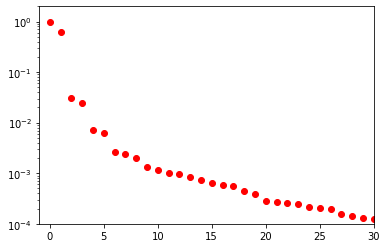

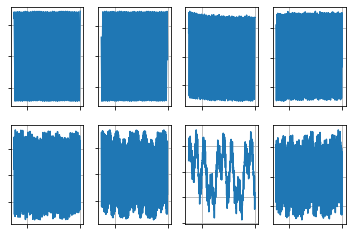

In [3]:
# load in sample data and plot it
S = np.loadtxt('data/plasmaphysics_example_singularValues.txt')
plt.figure(1)
plt.semilogy(S/S[0],'ro')
plt.ylim(1e-4,2)
plt.xlim(-1,30)

A = np.loadtxt('data/plasmaphysics_example_trajectories.txt')
time = A[:,0]
plt.figure(2)
plt.subplot(2,4,1)
plt.plot(time,A[:,1])
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.subplot(2,4,2)
plt.plot(time,A[:,2])
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.subplot(2,4,3)
plt.plot(time,A[:,3])
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.subplot(2,4,4)
plt.plot(time,A[:,4])
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.subplot(2,4,5)
plt.plot(time,A[:,5])
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.subplot(2,4,6)
plt.plot(time,A[:,6])
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.subplot(2,4,7)
plt.plot(time,A[:,7])
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.subplot(2,4,8)
plt.plot(time,A[:,8])
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])

In [39]:
# Let's run a SINDy model on the first 7 modes using the 
# unconstrainted SR3 algorithm with an initial guess
r = 7
poly_order = 2
threshold = 0.05
thresholds = None
thresholder = "l0"
tfac = 0.8
M = len(time)
M_train = int(len(time)*tfac)
t_train = time[:M_train]
t_test = time[M_train:]
pod_names = []
for i in range(r):
    pod_names.append(r'a{:d}'.format(i+1))
# Normalizing the trajectories to the unit ball for simplicity
for i in range(1,r+1):
    A[:,i] = A[:,i]/sum(np.amax(abs(A),axis=0)[1:r+1])
x = A[:,1:r+1]
# Define the custom library (in this case quadratic polynomials but we want
# to exclude the constant element)
library_functions = [lambda x : x, lambda x,y : x*y, lambda x : x**2]
library_function_names = [lambda x : x, lambda x,y : x+y, lambda x : x+x]
sindy_library = CustomLibrary(library_functions=library_functions, \
    function_names=library_function_names)
# Defining t
initial_guess = np.zeros((r+int(r*(r+1)/2),r))
initial_guess[0,1] = 0.091
initial_guess[1,0] = -0.091
initial_guess[2,3] = 0.182
initial_guess[3,2] = -0.182
initial_guess[5,4] = -3*0.091
initial_guess[4,5] = 3*0.091 
sindy_opt = SR3(threshold=threshold,nu=1,initial_guess=initial_guess,max_iter=1000)
model = SINDy(optimizer=sindy_opt, \
    feature_library=sindy_library, \
    differentiation_method=FiniteDifference(drop_endpoints=True), \
    feature_names=pod_names)
x_train = x[:M_train,:]
x0_train = x[0,:]
x_true = x[M_train:,:]
x0_test = x[M_train,:]
model.fit(x_train, t=t_train, unbias=False)
print(initial_guess)
model.print()
x_sim,output = model.simulate(x0_test,t_test, \
    integrator=odeint,stop_condition=None,full_output=True, \
    rtol=1e-20,h0=1e-5)
x_dot = model.differentiate(x, t=time)
x_dot_train = model.predict(x_train)
x_dot_sim = model.predict(x_true)
print('Model score: %f' % model.score(x, t=time))

[[ 0.          0.14420073  0.         -0.          0.          0.
  -0.         -0.          0.          0.          0.         -0.
  -0.          0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.          0.         -0.          0.
   0.          0.         -0.         -0.          0.          0.
   0.          0.          0.         -0.          0.        ]
 [-0.05704869 -0.          0.         -0.          0.         -0.
   0.         -0.          0.         -0.         -0.          0.
   0.         -0.         -0.          0.          0.          0.
   0.          0.          0.         -0.          0.         -0.
   0.         -0.         -0.          0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.        ]
 [ 0.          0.         -0.          0.20087087  0.          0.
   0.          0.06484564  0.          0.          0.          0.
   0.          0.         -0.          0.         -0.          0.
   0.         -0

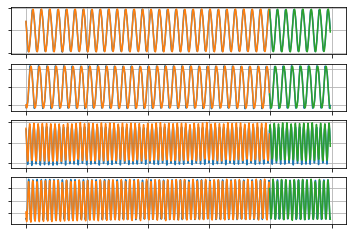

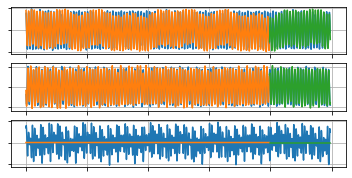

In [40]:
plot_trajectories(x_dot,x_dot_train,x_dot_sim)

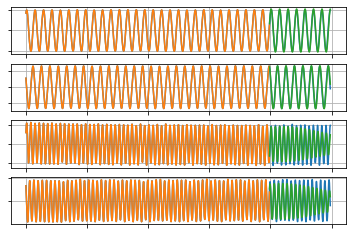

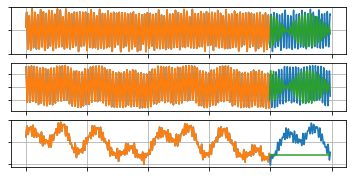

In [41]:
plot_trajectories(x,x_train,x_sim)

In [66]:
# Now let's run a SINDy model on the first 7 modes using the 
# constrainted SR3 algorithm with an initial guess
# Note that this constraint is specific to the MHD model used in these simulations
threshold = 0.05
thresholds = None
thresholder = "l0"
constraint_zeros = np.zeros(int(r*(r+1)/2))
constraint_matrix = np.zeros((int(r*(r+1)/2),int(r*(r**2+3*r)/2)))
for i in range(r):
    constraint_matrix[i,i*(r+1)] = 1.0
q = r
for i in range(r):
    counter = 1
    for j in range(i+1,r):
        constraint_matrix[q,i*r+j] = 1.0
        constraint_matrix[q,i*r+j+counter*(r-1)] = 1.0
        counter = counter + 1
        q = q + 1
sindy_opt = ConstrainedSR3(threshold=threshold, nu=1, max_iter=10000, \
    constraint_lhs=constraint_matrix,constraint_rhs=constraint_zeros, \
    tol=1e-6,thresholder=thresholder, \
    initial_guess=initial_guess,thresholds=thresholds)
model = SINDy(optimizer=sindy_opt, \
    feature_library=sindy_library, \
    differentiation_method=FiniteDifference(drop_endpoints=True), \
    feature_names=pod_names)
model.fit(x_train, t=t_train, unbias=False)
model.print()
x_sim,output = model.simulate(x0_test,t_test, \
    integrator=odeint,stop_condition=None,full_output=True, \
    rtol=1e-20,h0=1e-5)
x_dot = model.differentiate(x, t=time)
x_dot_train = model.predict(x_train)
x_dot_sim = model.predict(x_true)
print(constraint_matrix)
print('Model score: %f' % model.score(x, t=time))

[[-0.          0.05702833 -0.          0.          0.          0.
  -0.          0.          0.          0.65452363  0.         -0.
   0.         -0.81981116 -0.         -0.          0.         -0.
  -0.          0.         -0.          0.         -0.          0.
  -0.         -0.          0.         -0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [-0.05702833  0.         -0.         -0.          0.         -0.
   0.         -0.         -0.         -0.         -0.         -0.
   0.         -0.          0.          0.          0.          0.
   0.          0.         -0.         -0.          0.         -0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.         -0.          0.         -0.        ]
 [ 0.          0.          0.          0.15046328  0.          0.
   0.          0.42113035 -0.          0.          0.          0.
   0.          0.          0.          0.         -0.          0.
   0.         -0

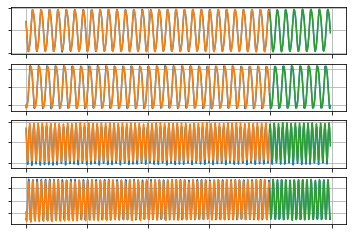

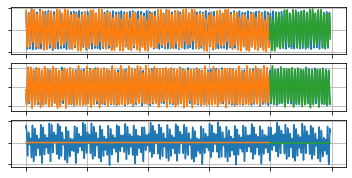

In [43]:
plot_trajectories(x_dot,x_dot_train,x_dot_sim)

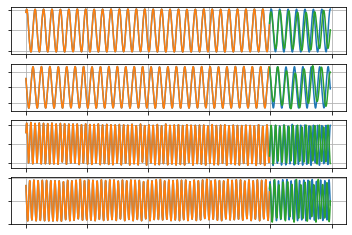

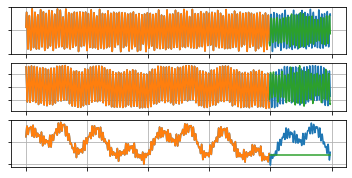

In [67]:
plot_trajectories(x,x_train,x_sim)

In [91]:
# Now let's run a SINDy model on the first 7 modes using the 
# constrainted SR3 algorithm with an initial guess AND variable thresholding
# First try: let's restrict only to linear terms by greatly increasing the thresholding on the quadratic terms 
tfac = 0.8
threshold = 0.05
thresholder = "weighted_l0"
thresholds = threshold*np.ones((r+int(r*(r+1)/2),r))
thresholds[r:,:] = 30*threshold*np.ones(thresholds[r:,:].shape)
sindy_opt = ConstrainedSR3(threshold=threshold, nu=10, max_iter=50000, \
    constraint_lhs=constraint_matrix,constraint_rhs=constraint_zeros, \
    tol=1e-5,thresholder=thresholder, \
    initial_guess=initial_guess,thresholds=thresholds)
model = SINDy(optimizer=sindy_opt, \
    feature_library=sindy_library, \
    differentiation_method=FiniteDifference(drop_endpoints=True), \
    feature_names=pod_names)
model.fit(x_train, t=t_train, unbias=False)
model.print()
x_sim,output = model.simulate(x0_test,t_test, \
    integrator=odeint,stop_condition=None,full_output=True, \
    rtol=1e-20,h0=1e-5)
x_dot = model.differentiate(x, t=time)
x_dot_train = model.predict(x_train)
x_dot_sim = model.predict(x_true)
print('Model score: %f' % model.score(x, t=time))

a1' = 0.083 a2
a2' = -0.083 a1
a3' = 0.179 a4
a4' = -0.179 a3
a5' = 0.261 a6 + -0.052 a7
a6' = -0.261 a5
a7' = 0.052 a5
Model score: 0.613331


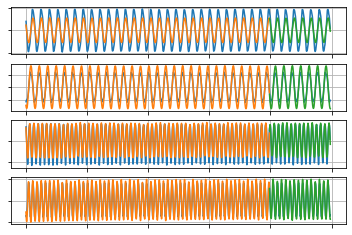

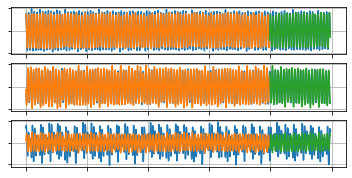

In [84]:
plot_trajectories(x_dot,x_dot_train,x_dot_sim)

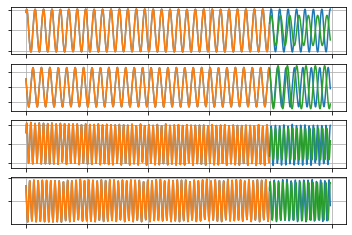

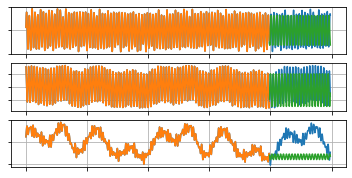

In [85]:
plot_trajectories(x,x_train,x_sim)

In [277]:
# Okay, so just linear terms look pretty good but have some small errors in the frequencies
# and the can't capture the 7th mode. Let's demand quadratic models for a3-a7, although there is a limit
# to the progress we can make with this set of modes (modes 1-6 are close to monochromatic
# which will make it difficult to capture frequency dependence beyond the driving frequency
# and its harmonics).
tfac = 0.8
threshold = 0.05
thresholder = "weighted_l0"
thresholds = threshold*np.ones((r+int(r*(r+1)/2),r))
thresholds[r:,0:2] = 30*threshold*np.ones(thresholds[r:,0:2].shape)
#thresholds[2:r,:] = 30*threshold*np.ones(thresholds[2:r,:].shape)
thresholds[r:,2] = 0.2*np.ones(thresholds[r:,2].shape)
thresholds[r:,3] = 0.05*np.ones(thresholds[r:,3].shape)
#thresholds[r:,2:4] = 0.08*np.ones(thresholds[r:,2:4].shape)
thresholds[r:,4:6] = 0.03*np.ones(thresholds[r:,4:6].shape)
#thresholds[r:,6] = 0.0*np.ones(thresholds[r:,6].shape)
sindy_opt = ConstrainedSR3(threshold=threshold, nu=10, max_iter=50000, \
    constraint_lhs=constraint_matrix,constraint_rhs=constraint_zeros, \
    tol=1e-5,thresholder=thresholder, \
    initial_guess=initial_guess,thresholds=thresholds)
model = SINDy(optimizer=sindy_opt, \
    feature_library=sindy_library, \
    differentiation_method=FiniteDifference(drop_endpoints=True), \
    feature_names=pod_names)
model.fit(x_train, t=t_train, unbias=False)
model.print()
x_sim,output = model.simulate(x0_test,t_test, \
    integrator=odeint,stop_condition=None,full_output=True, \
    rtol=1e-20,h0=1e-5)
x_dot = model.differentiate(x, t=time)
x_dot_train = model.predict(x_train)
x_dot_sim = model.predict(x_true)
print('Model score: %f' % model.score(x, t=time))

a1' = 0.083 a2
a2' = -0.083 a1
a3' = 0.204 a4
a4' = -0.204 a3 + 0.154 a1a5 + -0.178 a1a6 + -0.328 a2a5 + 0.091 a1a1 + -0.223 a2a2
a5' = 0.234 a6 + 0.174 a1a4 + 0.407 a2a3 + 0.269 a3a5 + 0.203 a3a7
a6' = -0.234 a5 + -0.359 a4a7
a7' = 0.122 a1a5 + 0.125 a1a6 + 0.115 a2a5 + -0.098 a2a6 + 0.467 a3a4 + 0.193 a3a3 + -0.341 a4a4
Model score: 0.808201


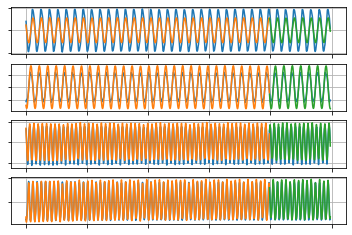

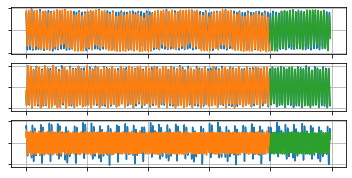

In [278]:
plot_trajectories(x_dot,x_dot_train,x_dot_sim)

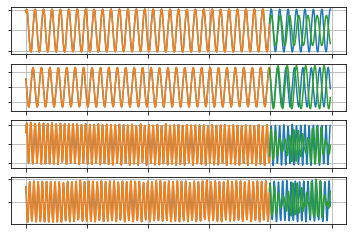

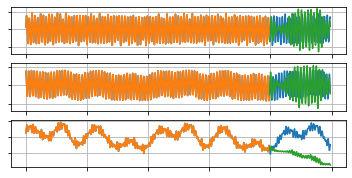

In [279]:
plot_trajectories(x,x_train,x_sim)

In [ ]:
# Need to play around longer or use more/less modes to capture this effectively with a quadratic model!